# User Experience Analysis

We will be continuing where we left of on the User Engagement notebook

In [1]:
%%capture
%run "./2-User-Engagement-Analysis.ipynb"
# users_data = users_data.head()
# if 'Unnamed: 0' in users_data.columns:
#     users_data.drop(columns=['Unnamed: 0'], inplace=True)


In [2]:
type(users_data)

pandas.core.groupby.generic.DataFrameGroupBy

per customer Aggregation of QoS related features

 - Average TCP retransmission Volumne
 - Average RTT durations in ms
 - Handset type
 - Average throughput


In [3]:
avg_TCPr_uldl_vol_columns = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']
avg_TCPr_uldl_vol = users_data[avg_TCPr_uldl_vol_columns].sum()
avg_TCPr_uldl_vol.head()

,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
MSISDN/Number,,
33601001722.00,21006808.73,771051.81
33601001754.00,21006808.73,771051.81
33601002511.00,21006808.73,771051.81
33601007832.00,1066.00,771051.81
33601008617.00,30356438.73,792253.81


In [4]:
avg_RTT_uldl_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)']
avg_RTT_uldl = users_data[avg_RTT_uldl_columns].sum()
avg_RTT_uldl.head()

,Avg RTT DL (ms),Avg RTT UL (ms)
MSISDN/Number,,
33601001722.00,46.00,0.00
33601001754.00,30.00,1.00
33601002511.00,45.00,5.00
33601007832.00,69.00,15.00
33601008617.00,114.00,5.00


In [5]:
handset_type = users_data['Handset Type'].unique()
handset_type.head(5)


MSISDN/Number
33601001722.00    [Huawei P20 Lite Huawei Nova 3E]
33601001754.00            [Apple iPhone 7 (A1778)]
33601002511.00                         [undefined]
33601007832.00           [Apple iPhone 5S (A1457)]
33601008617.00           [Apple iPhone Se (A1723)]
Name: Handset Type, dtype: object

In [6]:
avg_tp_uldl_columns = [
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)'
]
avg_tp_uldl = users_data[avg_tp_uldl_columns].sum()
avg_tp_uldl.head()


,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
MSISDN/Number,,
33601001722.00,37.00,39.00
33601001754.00,48.00,51.00
33601002511.00,48.00,49.00
33601007832.00,204.00,44.00
33601008617.00,40395.00,16449.00


## 10 of the top, bottom and most frequent:

 - TCP values in the dataset. 
 - RTT values in the dataset.
 - Throughput values in the dataset.


In [7]:
padding = '+'*15
for column in avg_TCPr_uldl_vol.columns:
    top_ten = avg_TCPr_uldl_vol[column].nlargest(10)
    bottom_ten = avg_TCPr_uldl_vol[column].nsmallest(10)
    most_frequent = avg_TCPr_uldl_vol[column].mode()
    print(f"{padding} TCP Values {padding}")
    print(f"Top Ten {column}:\n{top_ten}\n{padding*3}")
    print(f"Bottom Ten {column}:\n{bottom_ten}\n{padding*3}")
    print(f"Most Frequent {column}:\n{most_frequent}\n{padding*3}")

+++++++++++++++ TCP Values +++++++++++++++
Top Ten TCP DL Retrans. Vol (Bytes):
MSISDN/Number
33667725464.00   8332732777.00
33659084281.00   7938178623.00
33660977522.00   7374100838.00
33761284050.00   6039191773.00
33762644658.00   5878002490.00
33650658056.00   5590343967.00
33663180885.00   5562845158.00
33763572381.00   5178607391.00
33658638625.00   5165784763.00
33763859490.00   5094170807.00
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++
Bottom Ten TCP DL Retrans. Vol (Bytes):
MSISDN/Number
33664535559.00   2.00
33761543605.00   2.00
33669309035.00   4.00
33669328368.00   4.00
33699002991.00   4.00
33699060950.00   4.00
33761506920.00   4.00
33761544858.00   4.00
33761619710.00   4.00
33763938150.00   4.00
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++
Most Frequent TCP DL Retrans. Vol (Bytes):
0   21006808.73
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
+++++++++++++++++++++

 - The distribution of the `average throughput`  **per** `handset type`
 - The `average TCP retransmission` view **per** `handset type`


In [8]:
handsets_data = df.groupby('Handset Type')


The `average throughput`

<AxesSubplot:xlabel='Handset Type'>

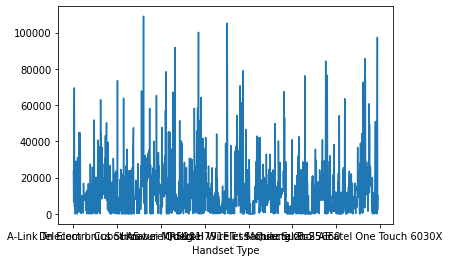

In [9]:
handsets_tp = handsets_data[avg_tp_uldl_columns].mean().sum(axis=1)
handsets_tp.plot()

The `average TCP retransmission` 

<AxesSubplot:xlabel='Handset Type'>

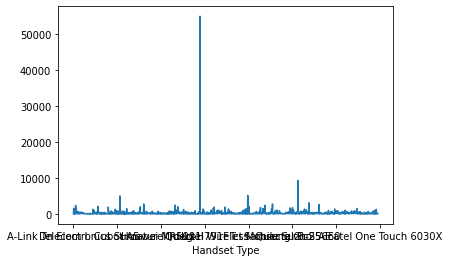

In [10]:
handsets_rtt = handsets_data[avg_RTT_uldl_columns].mean().sum(axis=1)
handsets_rtt.plot()

In [11]:
handsets_rtt.nlargest(5)

Handset Type
Lg Lg-D315                                          54848.00
Sfr Starxtrem5                                       9274.00
Qingdao Hisense. Starxtrem 6                         5133.00
Ecom Instruments. Ecom Mobile Safety Ex-Handy 209    4999.00
Sony Ericsson E15I                                   3092.00
dtype: float64

The `Lg Lg-D315` looks to be having the worst experiance in terms of retransmissions.
#### Check if it was an isolated incident.

In [27]:
lg_user = df[df['Handset Type'] == 'Lg Lg-D315']
print(f"There is {len(lg_user)} 'Lg Lg-D315' Users in the db")
from datetime import timedelta
session_duration = timedelta(milliseconds=lg_user['Dur. ms'].values[0])
print(session_duration)

There is 1 'Lg Lg-D315' Users in the db
12:25:31.150000


# K-means clustering

In [12]:
features = [avg_RTT_uldl,
            avg_TCPr_uldl_vol,
            avg_tp_uldl
            ]
experiance = {}
for data in features:
    for col in data.columns:
        experiance[col] = data[col]
user_experiance = pd.DataFrame(experiance)
user_experiance.head()

,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
MSISDN/Number,,,,,,
33601001722.00,46.00,0.00,21006808.73,771051.81,37.00,39.00
33601001754.00,30.00,1.00,21006808.73,771051.81,48.00,51.00
33601002511.00,45.00,5.00,21006808.73,771051.81,48.00,49.00
33601007832.00,69.00,15.00,1066.00,771051.81,204.00,44.00
33601008617.00,114.00,5.00,30356438.73,792253.81,40395.00,16449.00


In [13]:
# Pre-Process / Normalize
norm_user_experiance = cleaner.normalize(user_experiance)

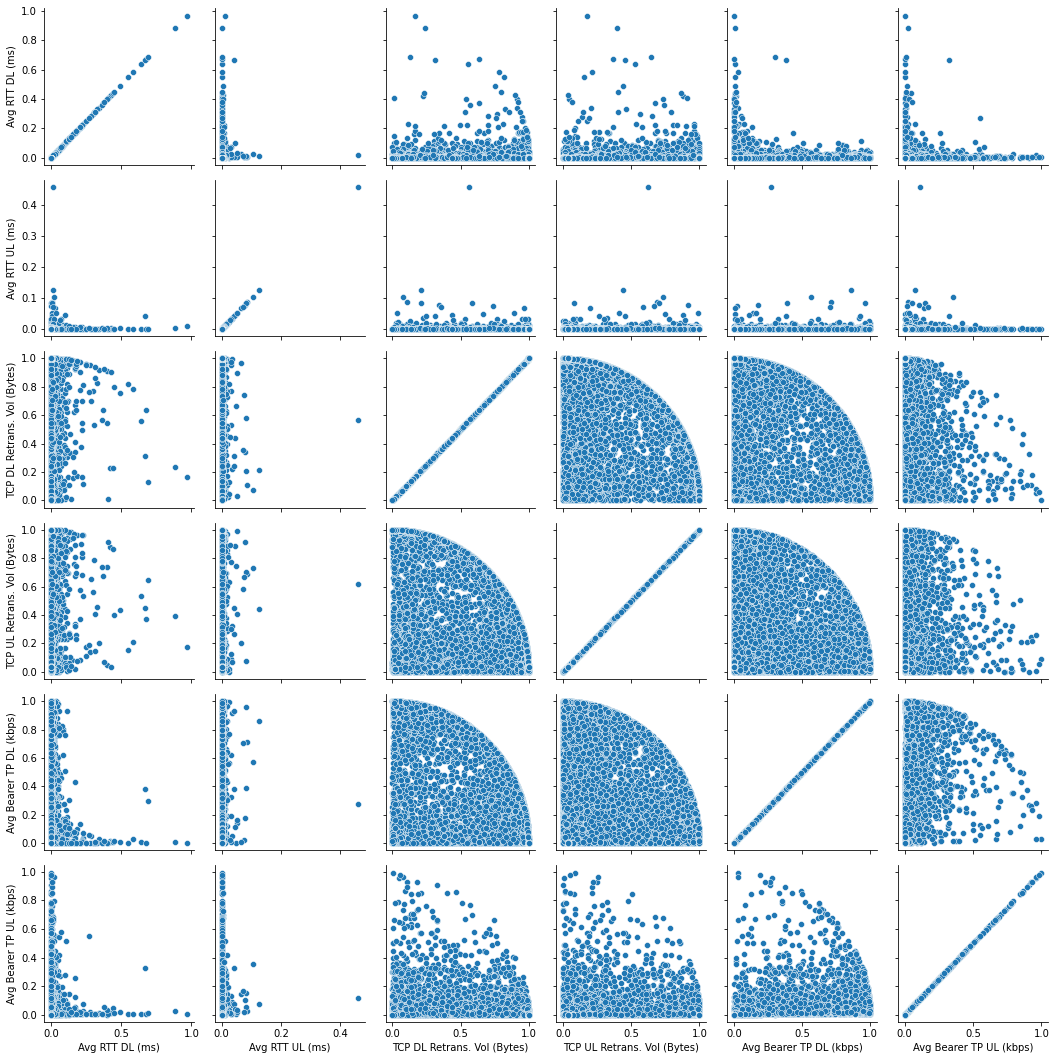

In [14]:
g = sns.PairGrid(norm_user_experiance)
g.map(sns.scatterplot)

In [15]:
X = np.array(norm_user_experiance)
X.shape



(106471, 6)

In [16]:
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=10)
model = kmeans.fit(X)
with open("../models/experiance_clustering_model.pkl", "wb") as f:
    pickle.dump(model, f)
    print("model saved")

user_experiance['clusters_by_experiance'] = model.predict(X)
user_experiance.head()


model saved


,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),clusters_by_experiance
MSISDN/Number,,,,,,,
33601001722.00,46.00,0.00,21006808.73,771051.81,37.00,39.00,0
33601001754.00,30.00,1.00,21006808.73,771051.81,48.00,51.00,0
33601002511.00,45.00,5.00,21006808.73,771051.81,48.00,49.00,0
33601007832.00,69.00,15.00,1066.00,771051.81,204.00,44.00,1
33601008617.00,114.00,5.00,30356438.73,792253.81,40395.00,16449.00,0


In [17]:
user_experiance.iloc[:, 1:].groupby("clusters_by_experiance").agg(['count', 'min', 'max', 'mean', 'sum', 'std', 'skew'])

Avg RTT UL (ms)                                           TCP DL Retrans. Vol (Bytes)                                                                      TCP UL Retrans. Vol (Bytes)                                                                   Avg Bearer TP DL (kbps)                                                      Avg Bearer TP UL (kbps)                                                  
                                 count  min     max  mean        sum   std  skew                       count    min           max        mean              sum          std  skew                       count    min           max       mean            sum         std   skew                   count   min       max     mean           sum      std skew                   count   min       max    mean          sum     std skew
clusters_by_experiance                                                                                                                                                                                                                                                                                                                                                                                                                
0                                96165 0.00 7120.00 21.07 2026373.00 98.98 25.48                       96165 334.00 8332732777.00 32398602.50 3115611609689.85 159263436.40 22.54                       96165   1.00  807925207.00  861316.52 82828503336.53  3576786.94 149.06                   96165  0.00 846163.00 18153.35 1745717082.00 38176.14 3.98                   96165  0.00 167024.00 2494.38 239872118.00 7195.85 6.35
1                                 7638 0.00 2685.00 25.45  194414.00 86.36 11.98                        7638   2.00  323300754.00   521192.58    3980868915.86   6398154.96 33.27                        7638 284.00 5169357738.81 4144712.45 31657313728.54 81010851.30  45.47                    7638  1.00 347967.00 17097.57  130591232.00 29057.18 3.80                    7638  0.00 122200.00 2093.24  15988166.00 6004.74 6.87
2                                 2668 1.00 3851.00 18.13   48370.00 83.63 36.96                        2668  31.00     277285.00    16738.73      44658941.00     25391.60  3.55                        2668   2.00     274507.00    7497.42    20003104.00    14154.10   7.71                    2668 91.00 363226.00 36344.96   96968341.00 31958.65 2.37                    2668 42.00  48689.00 2655.25   7084215.00 4737.00 4.07

In [19]:
X.shape

(106471, 6)